<a href="https://colab.research.google.com/github/pramud/Learning-Data-Science/blob/master/Copy_of_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=dec67cb1d2f6c992032134ead9244831e8086c5b86c623e815bb47cdb91ba660
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

import psutil
import humanize
import os, time
import GPUtil as GPU

print(tf.__version__)

2.3.0


In [ ]:
GPUs = GPU.getGPUs()
# only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def worker():
  while True:
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
    time.sleep(6)

import threading
t = threading.Thread(target=worker, name='Monitor')
t.start()

Gen RAM Free: 12.4 GB  I Proc size: 1.2 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 12.4 GB  I Proc size: 1.2 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [ ]:
# import os
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
data_df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/nela10.csv")

Gen RAM Free: 12.3 GB  I Proc size: 1.4 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 12.3 GB  I Proc size: 1.4 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [ ]:
data_df.Reliability.value_counts()

0    44582
2    12575
Name: Reliability, dtype: int64

In [ ]:
data_df.Reliability = data_df.Reliability.map({0:0, 2:1})

Gen RAM Free: 12.4 GB  I Proc size: 1.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [ ]:
data_df.shape

(57157, 11)

In [ ]:
data_df.content.drop_duplicates().shape

(54823,)

In [ ]:
data_df['content'] = data_df['content'].str.replace('\n', ' ').str.strip()

In [ ]:
data_df[(data_df.content.str.len()> 0) & (data_df.content.str.len()< 30)][['content','Reliability']]

,content,Reliability
4399,# Rod Rosenstein to step down,0
4623,# Veteran being held in Iran,0
16909,# Democrats Without Clothes,0
17054,Visit the post for more.,0
17059,# The Making of Amazon Prime,0
17109,Visit the post for more.,0
17133,# End the War in Afghanistan,0
17354,The State of the Shutdown,0
17441,# Trump's Not-So-Bully Pulpit,0
17534,The Art of the Fail?,0


In [ ]:
data_df.drop( data_df[data_df.content.str.len() < 30].index, inplace=True)

In [ ]:
data_df.head()

,id,date,source,title,content,author,url,published,published_utc,collection_utc,Reliability
0,abcnews--2019-01-30--Who is Stacey Abrams the ...,2019-01-30,abcnews,"Who is Stacey Abrams, the Democrat who will re...","Last November, Stacey Abrams, a Democrat who r...",Cheyenne Haslett,https://abcnews.go.com/Politics/stacey-abrams-...,2019-01-30 19:10:47+00:00,1548893447,1567550233,0
1,abcnews--2019-01-30--Ban government shutdowns ...,2019-01-30,abcnews,Ban government shutdowns? Some Republicans and...,As lawmakers scramble to negotiate a border se...,"Benjamin Siegel,\nTrish Turner\n",https://abcnews.go.com/Politics/ban-government...,2019-01-30 17:29:04+00:00,1548887344,1567550233,0
2,abcnews--2019-01-30--Democrats renew push for ...,2019-01-30,abcnews,Democrats renew push for equal pay for equal work,Ten years after President Barack Obama signed ...,John Parkinson,https://abcnews.go.com/Politics/dems-renew-pus...,2019-01-30 21:35:45+00:00,1548902145,1567550233,0
3,abcnews--2019-01-30--Trump attacks intel chief...,2019-01-30,abcnews,Trump attacks intel chiefs after they contradi...,"President Donald Trump on Wednesday declared ""...",Meridith Mcgraw,https://abcnews.go.com/Politics/trump-attacks-...,2019-01-30 17:03:40+00:00,1548885820,1567550233,0
4,abcnews--2019-01-30--Border security battle be...,2019-01-30,abcnews,Border security battle begins as Congress grap...,Republicans and Democrats on the exclusive com...,"John Parkinson,\nBenjamin Siegel\n",https://abcnews.go.com/Politics/border-securit...,2019-01-30 15:09:47+00:00,1548878987,1567550233,0


In [ ]:
#Keep only content, Reliability as columns
data_df = data_df.drop(['id','date','source','title','author','url','published','published_utc','collection_utc'],axis=1)

In [ ]:
data_df.head()

,content,Reliability
0,"Last November, Stacey Abrams, a Democrat who r...",0
1,As lawmakers scramble to negotiate a border se...,0
2,Ten years after President Barack Obama signed ...,0
3,"President Donald Trump on Wednesday declared ""...",0
4,Republicans and Democrats on the exclusive com...,0


In [ ]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(data_df['content'], data_df['Reliability'], test_size=0.20, random_state=42)

In [ ]:
train_y.value_counts(), valid_y.value_counts()

(0    35609
 1    10023
 Name: Reliability, dtype: int64, 0    8869
 1    2539
 Name: Reliability, dtype: int64)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x.values, train_y.values))
test_dataset = tf.data.Dataset.from_tensor_slices((valid_x.values, valid_y.values))

In [ ]:
for feat, targ in train_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Gen RAM Free: 11.9 GB  I Proc size: 2.0 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Features: b'Thousands of festival-goers at Glastonbury formed Extinction Rebellion\'s hourglass symbol in a bid to draw attention to climate change issues.  The protest group joined forces with long-time event partner Greenpeace in a call to join a climate-climate rebellion.  The campaigners marched through Worthy Farm led by Extinction Rebellion\'s pink "Tell the Truth" boat, which was last seen in London\'s Oxford Circus when the group brought parts of the British capital to a standstill in April.  They called on ordinary people to join a youth strike planned for September, which they said aimed to force government and business to take the climate emergency seriously.  Activist Lizzy Haughton said while sitting in the middle of the symbol: "I think people are finally beginning to realise that, in order to tackle the climate and ecological emergency, we are going to have to be radi

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'Weekly Roundup: The Passion Of Saint iGNUcius Edition  Posted on September 16, 2019 by Jack Baruth  I was there, outside the Chinese restaurant, when Richard Stallman screamed and began to run from the raindrops.  It was early in 2001 and I was at MIT \xe2\x80\xa6  Dealing with GNU/Linux meant dealing with Richard Stallman, the eccentric genius who had guided the creation of pretty much everything but the Linux kernel itself. I say \xe2\x80\x9ceccentric\xe2\x80\x9d, but what I\xe2\x80\x99m really saying is that Stallman is mentally ill. I don\xe2\x80\x99t know the correct words to describe that illness, but it manifests itself in dozens of different ways, from extreme hydrophobia (fear of water!) to various disturbing habits of phraseology, communication, and physical behavior. Nobody who knows Stallman thinks he is sane. By the same token, nobody would doubt his intelligence. \xe2\x80\xa6  Stallman agreed to eat dinner with me on the condition that he be permitted to order 

**Create the text encoder**

The raw text loaded by tfds needs to be processed before it can be used in a model. The simplest way to process text for training is using the experimental.preprocessing.TextVectorization layer. This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's .adapt method:

In [ ]:
VOCAB_SIZE=1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

Gen RAM Free: 11.9 GB  I Proc size: 2.0 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 11.9 GB  I Proc size: 2.0 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


The .adapt method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency:

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'in', 'that', 'for',
       'is', 'on', 'with', 'was', 'it', 'as', 'he', 'said', 'at', 'be'],
      dtype='<U14')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed output_sequence_length):

In [ ]:
encoded_example = encoder(train_x.to_list()[1])[:3].numpy()
encoded_example

array([  6, 203,   1])

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
Gen RAM Free: 11.9 GB  I Proc size: 2.1 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 11.3 GB  I Proc size: 2.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
  9/713 [..............................] - ETA: 1:36 - loss: 0.6897 - accuracy: 0.7778Gen RAM Free: 10.4 GB  I Proc size: 4.1 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 34/713 [>.............................] - ETA: 2:23 - loss: 0.6765 - accuracy: 0.7845Gen RAM Free: 10.0 GB  I Proc size: 4.6 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 59/713 [=>............................] - ETA: 2:24 - loss: 0.6568 - accuracy: 0.7839Gen RAM Free: 10.0 GB  I Proc size: 4.6 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 87/713 [==>...........................] - ETA: 2:17 - loss: 0.6188 - accuracy: 0.7847Gen RAM Free: 10.0 GB  I Proc size: 4.6 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
114/713 [===>..

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

 11/179 [>.............................] - ETA: 19s - loss: 0.2691 - accuracy: 0.8906Gen RAM Free: 9.9 GB  I Proc size: 4.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 62/179 [=========>....................] - ETA: 13s - loss: 0.2877 - accuracy: 0.8866Gen RAM Free: 9.9 GB  I Proc size: 4.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
116/179 [==================>...........] - ETA: 7s - loss: 0.2937 - accuracy: 0.8824Gen RAM Free: 9.9 GB  I Proc size: 4.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
159/179 [=========================>....] - ETA: 2s - loss: 0.2911 - accuracy: 0.8831Gen RAM Free: 9.9 GB  I Proc size: 4.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
179/179 [==============================] - 22s 125ms/step - loss: 0.2892 - accuracy: 0.8834
Test Loss: 0.2892296314239502
Test Accuracy: 0.883415162563324


(0.0, 0.5018977865576744)

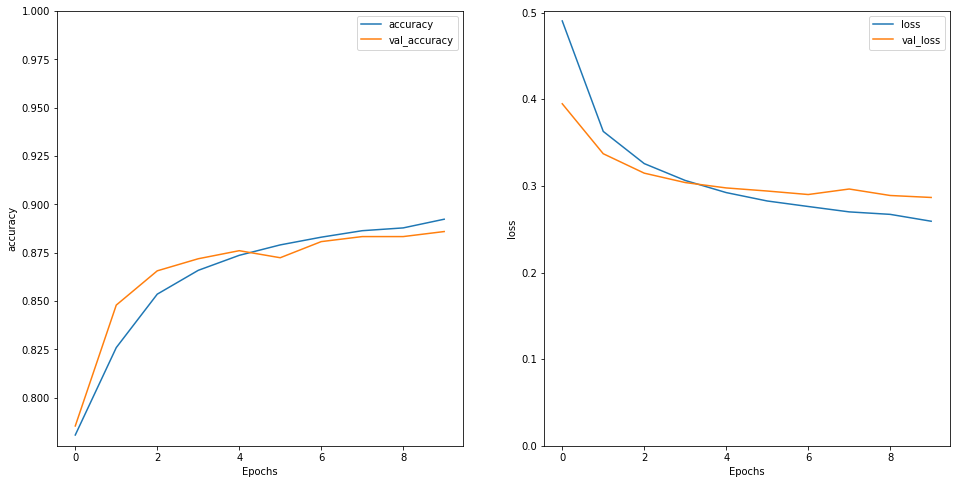

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [ ]:
#saving a model in HDF5 format
#model is a tf.keras.Model object created using any of the above methods
model.save("/content/drive/My Drive/Colab_Notebooks/rnn_lstm_v1.tf", save_format='tf')

Gen RAM Free: 9.9 GB  I Proc size: 4.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Gen RAM Free: 9.7 GB  I Proc size: 4.9 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 9.5 GB  I Proc size: 5.1 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab_Notebooks/rnn_lstm_v1.tf/assets


In [ ]:
tf.__version__

'2.3.0'

**Stack two or more LSTM layers**

In [ ]:
model2 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
Gen RAM Free: 9.5 GB  I Proc size: 5.3 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 9.8 GB  I Proc size: 5.3 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 9.8 GB  I Proc size: 5.3 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 13/713 [..............................] - ETA: 3:24 - loss: 0.6875 - accuracy: 0.7885Gen RAM Free: 9.8 GB  I Proc size: 5.3 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 26/713 [>.............................] - ETA: 4:03 - loss: 0.6819 - accuracy: 0.7764Gen RAM Free: 9.8 GB  I Proc size: 5.3 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 39/713 [>.............................] - ETA: 4:33 - loss: 0.6724 - accuracy: 0.7857Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 53/713 [=>............................] - ETA: 4:30 - loss: 0.6608 - accuracy: 0.7833Gen RAM Free: 9.6 GB 

In [ ]:
test_loss, test_acc = model2.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

 16/179 [=>............................] - ETA: 39s - loss: 0.2687 - accuracy: 0.8857Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 45/179 [======>.......................] - ETA: 28s - loss: 0.2907 - accuracy: 0.8767Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
 70/179 [==========>...................] - ETA: 24s - loss: 0.2922 - accuracy: 0.8788Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
101/179 [===============>..............] - ETA: 16s - loss: 0.2984 - accuracy: 0.8745Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
125/179 [===================>..........] - ETA: 12s - loss: 0.3032 - accuracy: 0.8739Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
146/179 [=======================>......] - ETA: 7s - lo

(0.0, 0.5256183803081512)

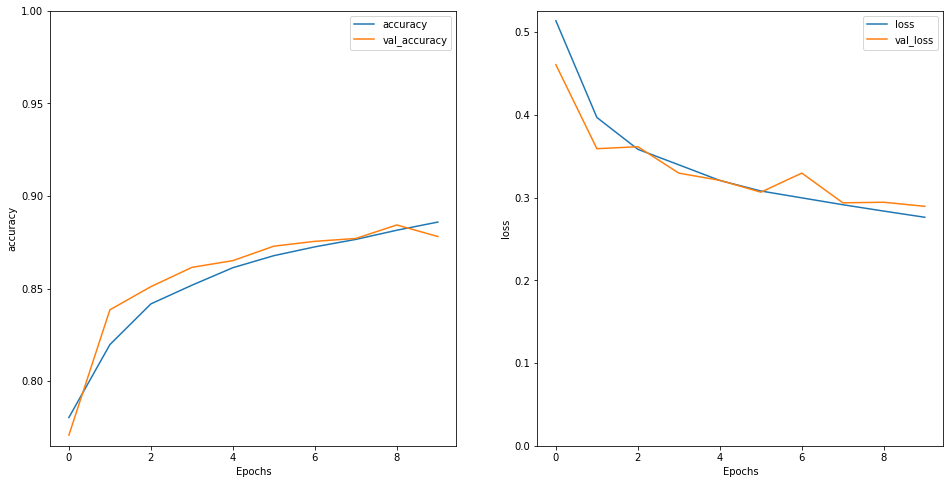

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history2, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history2, 'loss')
plt.ylim(0,None)

In [ ]:
#saving a model in HDF5 format
#model is a tf.keras.Model object created using any of the above methods
model.save("/content/drive/My Drive/Colab_Notebooks/rnn_lstm2_v1.tf", save_format='tf')

Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 9.6 GB  I Proc size: 5.5 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
Gen RAM Free: 9.4 GB  I Proc size: 5.7 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab_Notebooks/rnn_lstm2_v1.tf/assets
